To-Do
- Specify procedure for outliers (additional?)
- Check standardization of features
- Interaction Terms for protected attributes

# Data Cleaning and EDA - Continued

This notebook picks up where the first analysis notebook has ended, after value imputation and preliminary outlier removal. The pickle saved at the end of the first workbook will be the starting point here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
sns.set_theme(style="darkgrid", context= "paper")

In [2]:
HMDA_clean = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/processed/HMDA_cleaned.pkl")

## Additional Typecasting

In the previous notebook, the only aim of adjusting the data types was to get all of them in a numerical format in order to facilitate imputation and analysis. Now, the data types will be cast to their correct format.

In [3]:
str_cols = ["county_code"]
cat_cols = ["conforming_loan_limit", "action_taken", "purchaser_type", "preapproval", "loan_type", "loan_purpose", "lien_status", "reverse_mortgage", "open-end_line_of_credit", "business_or_commercial_purpose",
            "hoepa_status", "negative_amortization", "interest_only_payment", "balloon_payment", "other_nonamortizing_features", "occupancy_type", "manufactured_home_secured_property_type", "manufactured_home_land_property_interest", "total_units", 
            "applicant_credit_score_type", "applicant_ethnicity-1", "applicant_ethnicity-2",
            "applicant_ethnicity_observed", "applicant_race-1",	"applicant_race-2",	"applicant_race_observed", "applicant_sex",	"applicant_sex_observed", "applicant_age", "submission_of_application", "initially_payable_to_institution", "aus-1"]

In [4]:
HMDA_clean[str_cols] = HMDA_clean[str_cols].round(0).astype("str")
HMDA_clean[cat_cols] = HMDA_clean[cat_cols].astype("category")

## Target Variable Specification

Currently, the categorical **action_taken** includes information on the target variable. This will be removed and a new binary variable **loan_granted** will be created. This variable will be used for classification purposes.

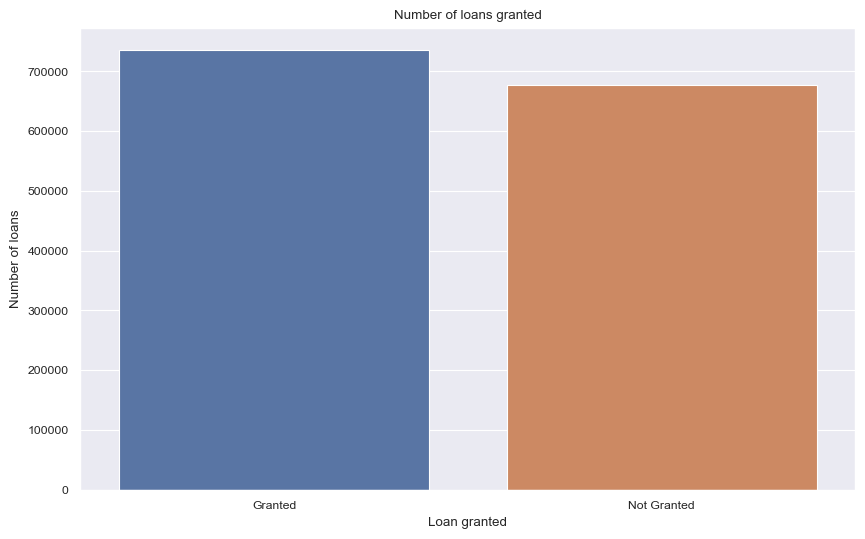

In [5]:
HMDA_clean["loan_granted"] = HMDA_clean["action_taken"].apply(lambda x: "Granted" if x == 1 else "Not Granted")
HMDA_clean = HMDA_clean.drop(columns = "action_taken")
HMDA_clean["loan_granted"] = HMDA_clean["loan_granted"].astype("category")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x = "loan_granted", data = HMDA_clean, ax = ax)
ax.set_title("Number of loans granted")
ax.set_xlabel("Loan granted")
ax.set_ylabel("Number of loans")
plt.show()

In total, it appears that the **loan_granted** variable is roughly balanced between granted and not granted applications.

## Initial EDA for Distributions per Protected Attribute

As a first step, a visual inspection on how loan grants vary between different protected attributes will be conducted.

In [6]:
HMDA_clean["applicant_ethnicity-1"] = HMDA_clean["applicant_ethnicity-1"].astype("float").round(0).astype("category")
HMDA_clean["applicant_ethnicity-2"] = HMDA_clean["applicant_ethnicity-2"].astype("float").round(0).astype("category")

HMDA_clean["applicant_ethnicity-1"] = HMDA_clean["applicant_ethnicity-1"].replace({1: "Hispanic or Latino", 2: "Not Hispanic or Latino", 3: "Information not provided", 4: "Not applicable", 11: "Mexican", 12: "Puerto Rican", 13: "Cuban", 14: "Other Hispanic or Latino", 99: "Missing"})
HMDA_clean["applicant_ethnicity-2"] = HMDA_clean["applicant_ethnicity-2"].replace({1: "Hispanic or Latino", 2: "Not Hispanic or Latino", 3: "Information not provided", 4: "Not applicable", 11: "Mexican", 12: "Puerto Rican", 13: "Cuban", 14: "Other Hispanic or Latino", 99: "Missing"})

HMDA_clean = HMDA_clean[HMDA_clean["applicant_ethnicity-1"].isin(["Hispanic or Latino", "Not Hispanic or Latino", "Information not provided", "Not applicable", "Mexican", "Puerto Rican", "Cuban", "Other Hispanic or Latino", "Missing"])]
HMDA_clean = HMDA_clean[HMDA_clean["applicant_ethnicity-2"].isin(["Hispanic or Latino", "Not Hispanic or Latino", "Information not provided", "Not applicable", "Mexican", "Puerto Rican", "Cuban", "Other Hispanic or Latino", "Missing"])]

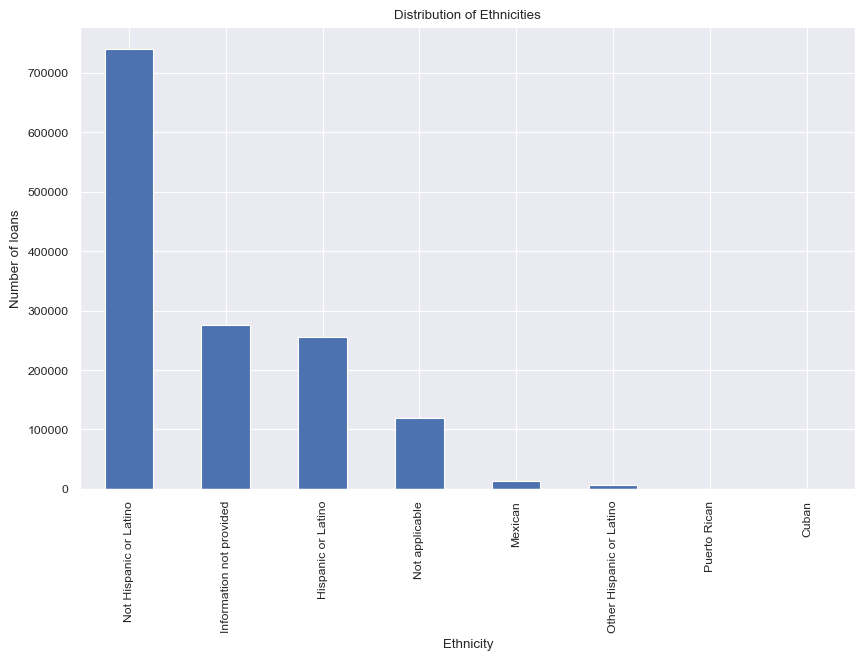

In [7]:
HMDA_clean["applicant_ethnicity-1"].value_counts().plot(kind = "bar", title = "Distribution of Ethnicities", xlabel = "Ethnicity", ylabel = "Number of loans", figsize = (10, 6));

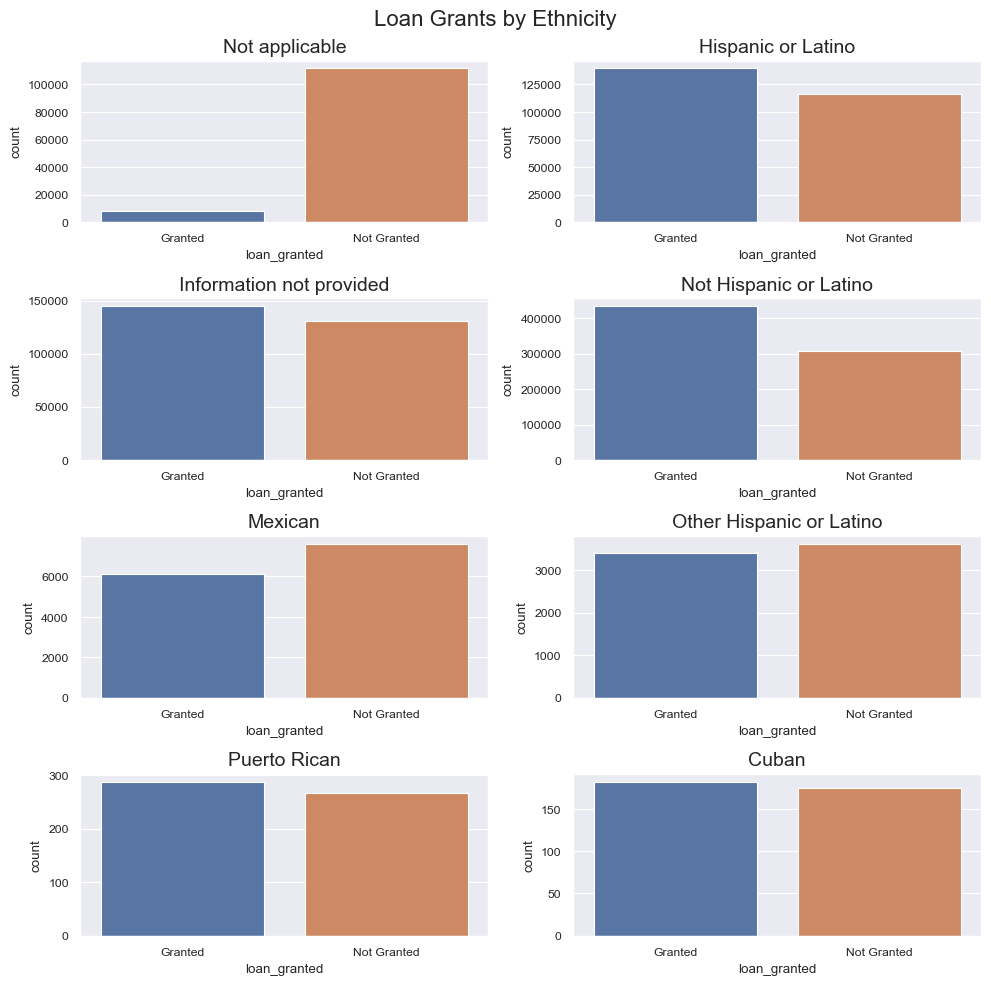

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle("Loan Grants by Ethnicity", fontsize=16)

for i, col in enumerate(HMDA_clean["applicant_ethnicity-1"].unique()):
    sns.countplot(x="loan_granted", data=HMDA_clean[HMDA_clean["applicant_ethnicity-1"] == col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

In [9]:
HMDA_clean["applicant_race-1"] = HMDA_clean["applicant_race-1"].replace({1: "American Indian or Alaska Native", 2: "Asian", 3: "Black or African American", 4: "Native Hawaiian or Other Pacific Islander", 5: "White", 6: "Information not provided", 7: "Not applicable", 21: "Asian Indian", 22: "Chinese", 23: "Filipino", 24: "Japanese", 25: "Korean", 26: "Vietnamese", 27: "Other Asian", 41: "Native Hawaiian", 42: "Guamanian or Chamorro", 43: "Samoan", 44: "Other Pacific Islander"})
HMDA_clean["applicant_race-2"] = HMDA_clean["applicant_race-2"].replace({1: "American Indian or Alaska Native", 2: "Asian", 3: "Black or African American", 4: "Native Hawaiian or Other Pacific Islander", 5: "White", 6: "Information not provided", 7: "Not applicable", 21: "Asian Indian", 22: "Chinese", 23: "Filipino", 24: "Japanese", 25: "Korean", 26: "Vietnamese", 27: "Other Asian", 41: "Native Hawaiian", 42: "Guamanian or Chamorro", 43: "Samoan", 44: "Other Pacific Islander"})

# HMDA_clean["applicant_race-1"] = HMDA_clean[HMDA_clean["applicant_race-1"].isin(["American Indian or Alaska Native", "Asian", "Black or African American", "Native Hawaiian or Other Pacific Islander", "White", "Information not provided", "Not applicable", "Asian Indian", "Chinese", "Filipino", "Japanese", "Korean", "Vietnamese", "Other Asian", "Native Hawaiian", "Guamanian or Chamorro", "Samoan", "Other Pacific Islander"])]
# HMDA_clean["applicant_race-2"] = HMDA_clean[HMDA_clean["applicant_race-2"].isin(["American Indian or Alaska Native", "Asian", "Black or African American", "Native Hawaiian or Other Pacific Islander", "White", "Information not provided", "Not applicable", "Asian Indian", "Chinese", "Filipino", "Japanese", "Korean", "Vietnamese", "Other Asian", "Native Hawaiian", "Guamanian or Chamorro", "Samoan", "Other Pacific Islander"])]

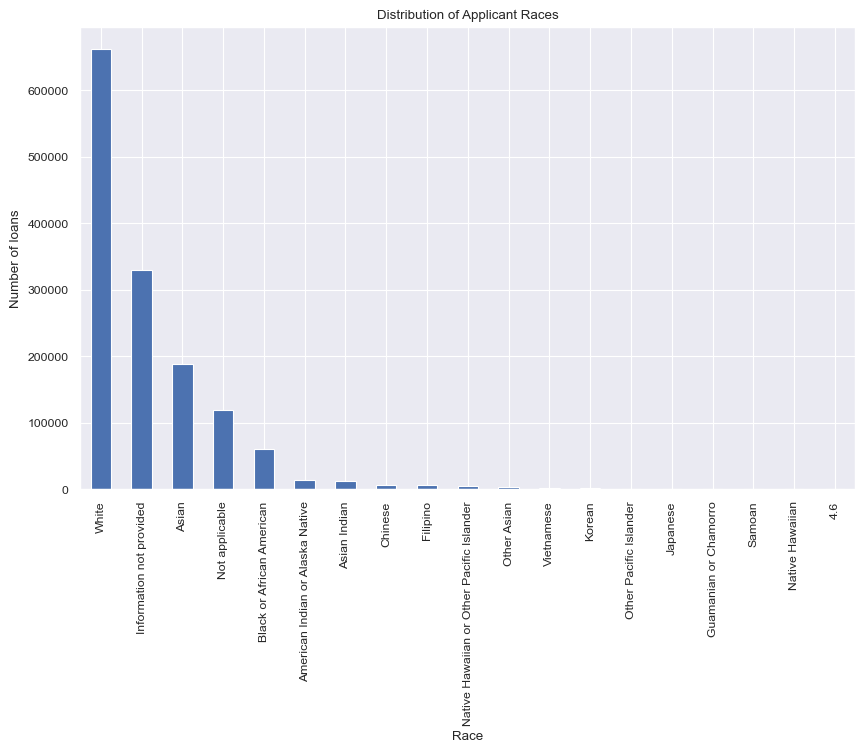

In [10]:
HMDA_clean["applicant_race-1"].value_counts().plot(kind = "bar", title = "Distribution of Applicant Races", xlabel = "Race", ylabel = "Number of loans", figsize = (10, 6));

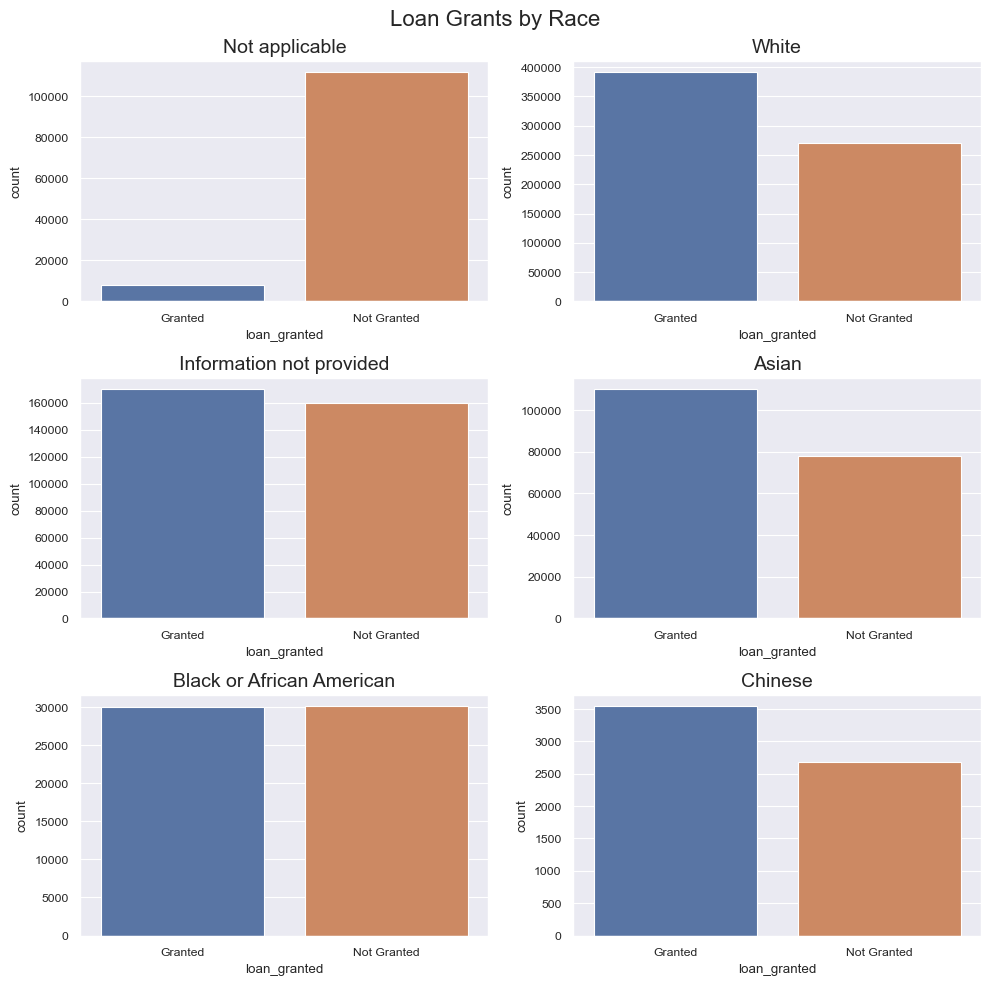

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle("Loan Grants by Race", fontsize=16)

for i, col in enumerate(HMDA_clean["applicant_race-1"].unique()[:6]):
    sns.countplot(x="loan_granted", data=HMDA_clean[HMDA_clean["applicant_race-1"] == col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
HMDA_clean["applicant_sex"] = HMDA_clean["applicant_sex"].replace({1: "Male", 2: "Female", 3: "Information not provided", 4: "Not applicable", 6: "Applicant selected both male and female"})

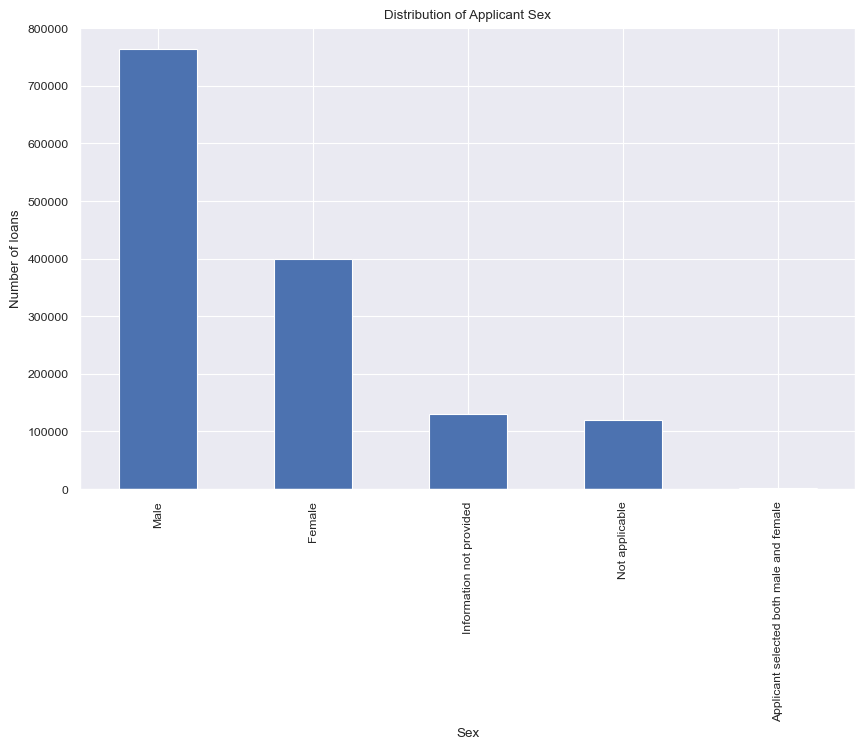

In [13]:
HMDA_clean["applicant_sex"].value_counts().plot(kind = "bar", title = "Distribution of Applicant Sex", xlabel = "Sex", ylabel = "Number of loans", figsize = (10, 6));

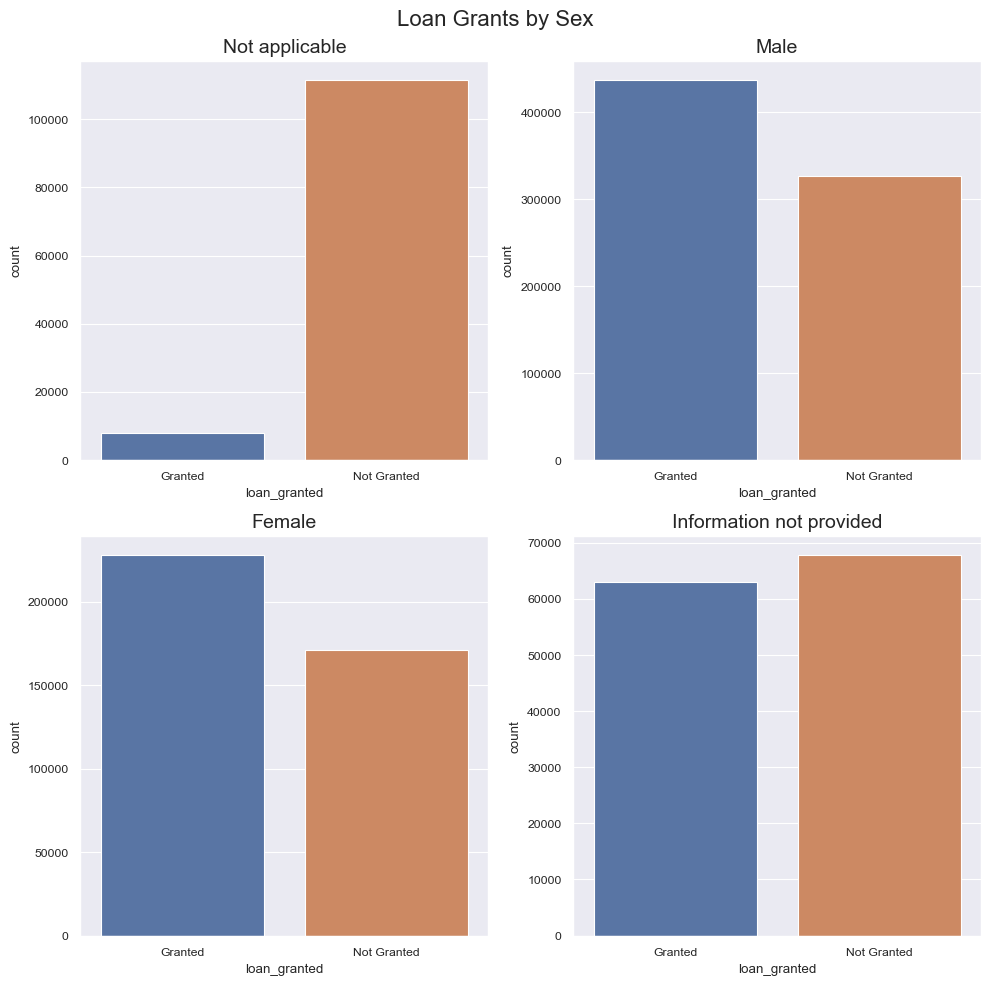

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Loan Grants by Sex", fontsize=16)

for i, col in enumerate(HMDA_clean["applicant_sex"].unique()[:4]):
    sns.countplot(x="loan_granted", data=HMDA_clean[HMDA_clean["applicant_sex"] == col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

loan_granted                                1.000000
hoepa_status                                0.700946
applicant_credit_score_type                 0.563321
initially_payable_to_institution            0.356116
aus-1                                       0.246341
applicant_age                               0.243425
applicant_sex                               0.228485
applicant_race_observed                     0.220247
applicant_sex_observed                      0.219354
applicant_ethnicity_observed                0.217838
submission_of_application                   0.198702
applicant_ethnicity-1                       0.173513
applicant_race-1                            0.108916
preapproval                                 0.088704
loan_purpose                                0.081562
loan_type                                   0.057213
interest_only_payment                       0.051704
applicant_race-2                            0.040424
balloon_payment                             0.

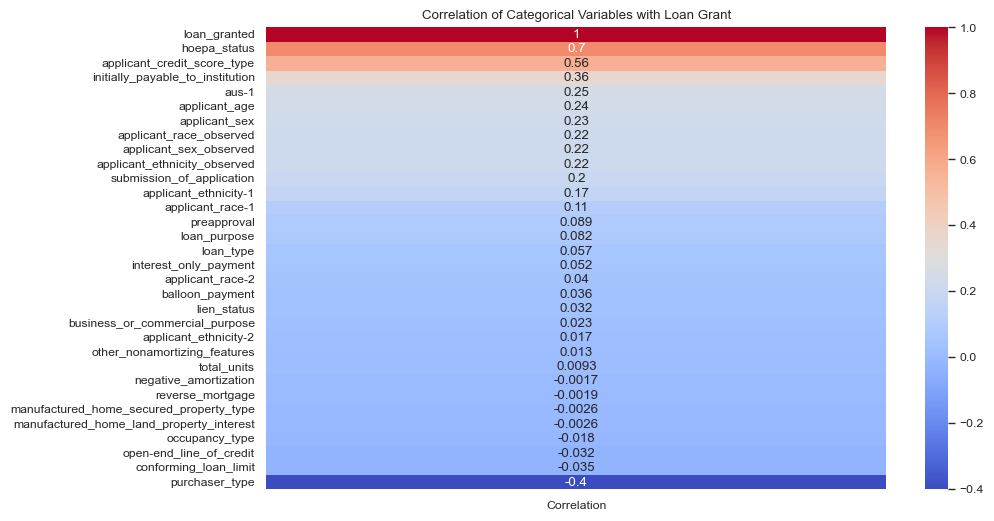

In [27]:
print(HMDA_clean.select_dtypes(include = "category").apply(lambda x: x.cat.codes).corrwith(HMDA_clean["loan_granted"].cat.codes).sort_values(ascending = False))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(HMDA_clean.select_dtypes(include = "category").apply(lambda x: x.cat.codes).corrwith(HMDA_clean["loan_granted"].cat.codes).sort_values(ascending = False).to_frame("Correlation"), annot = True, cmap = "coolwarm", ax = ax)
ax.set_title("Correlation of Categorical Variables with Loan Grant")
plt.show()